#### **Model Training**

- **Libraries**

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

import joblib
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

scaler = MinMaxScaler()
encoder = LabelEncoder()



- **load the Cleaned and encoded Data**

In [47]:
df2 = pd.read_csv(r"C:\Users\Admin\GitHub\Class Assignment and Projects\DSA3020\Crop-Recommendation-Capstone-Project\data\Crop_recommendation_encoded.csv")
df2.head()


,Nitrogen,Phosphorous,Potassium,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,94.867624,20
2,60,55,44,23.004459,82.320763,7.840207,94.867624,20
3,74,35,40,26.491096,80.158363,6.980401,94.867624,20
4,78,42,42,20.130175,81.604873,7.628473,94.867624,20


- **Feature and Target Variables** 

In [48]:
df2["label"].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5], dtype=int64)

In [49]:
df2.columns

Index(['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall', 'label'],
      dtype='object')

In [50]:
features= ['Nitrogen', 'Phosphorous', 'Potassium', 'temperature', 'humidity', 'ph',
       'rainfall']
target= 'label'

X=df2[features]
Y=df2[target]

#### **Transformation**

In [51]:
X_scaled = scaler.fit_transform(X)
Y_scaled = encoder.fit_transform(Y)

#### **Split**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y_scaled,test_size = 0.2,random_state = 42)

#### **Logistic Regression**

In [53]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

  - **Prediction**

In [54]:

y_pred = log_reg.predict(X_train)
print(y_pred[:6])
y_pred_test = log_reg.predict(X_test)
print(y_pred_test[:6])



[16  2 10  1 12 11]
[15 21 17 17  0 12]


#### **Evaluation**

- **MAE**

In [ ]:
training_mae_lr =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_lr:.2f}");
test_mae_lr= mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_lr:.2f}"));

Training MAE: 0.54
Test MAE: 0.58
None


- **Accuracy**

In [ ]:
mas_train_lr= metrics.accuracy_score(y_train, y_pred)
print(f"Logistic Regression's Train Accuracy is: {mas_train_lr:.2f}");
mas_test_lr = metrics.accuracy_score(y_test, y_pred_test)
print(f"Logistic Regression's Test Accuracy is: {mas_test_lr:.2f}");

Logistic Regression's Train Accuracy is: 0.94
Logistic Regression's Test Accuracy is: 0.93


- **Confusion Matrix**

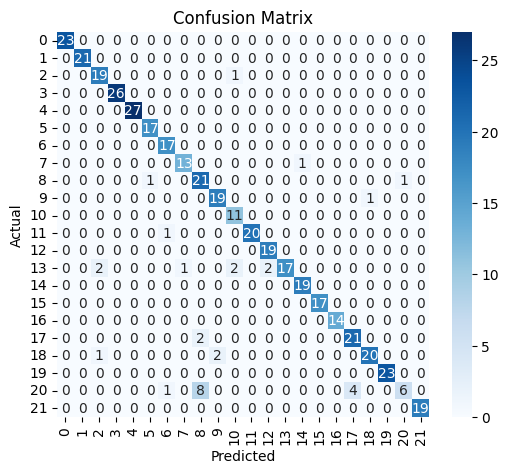

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **Precision** and **Recall**

In [ ]:
# Precision and recall (macro average for multiclass)
precision = precision_score(y_test, y_pred_test, average='macro')
recall = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1:.2f}")


Precision: 0.93
Recall: 0.93
F1-score:0.92


#### **Cross Validation**

In [ ]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores = cross_val_score(log_reg, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_lr= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_lr)

#### **Decision Tree Classifier**

- **Base Model** 

In [61]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=5)

DecisionTree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

- **Predict Values**

In [62]:
y_pred = DecisionTree.predict(X_train)
print(y_pred[:6])
y_pred_test = DecisionTree.predict(X_test)
print(y_pred_test[:5])



[16  2 10  1 12 11]
[15 21 17 17  0]


#### **Evaluation**

- **MAE**

In [ ]:
training_mae_dtc =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_dtc:.2f}");
test_mae_dtc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_dtc:.2f}"));

Training MAE: 0.76
Test MAE: 1.05
None


- **Accuracy**

In [ ]:
mas_train_dtc= metrics.accuracy_score(y_train, y_pred)
print(f"DecisionTrees's Train Accuracy is: {mas_train_dtc:.2f}");
mas_test_dtc= metrics.accuracy_score(y_test, y_pred_test)
print(f"DecisionTrees's Test Accuracy is: {mas_test_dtc:.2f}");

DecisionTrees's Train Accuracy is: 0.92
DecisionTrees's Test Accuracy is: 0.89


#### **Cross Validation**

In [ ]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores = cross_val_score(DecisionTree, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_dtc= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_dtc)

### **RandomForestClassifier**

- #### **RF-Model**

In [65]:
Model_rf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42, max_depth=5)
Model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, random_state=42)

- #### **Prediction**

In [ ]:
y_pred = Model_rf.predict(X_train)
print(y_pred[:6])
y_pred_test = Model_rf.predict(X_test)
print(y_pred_test[:5])

[16  2 10  1 12 11]
[15 21 17 17  0]


#### **Evaluation**

- **MAE**

In [ ]:
training_mae_rf=mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae_rf:.2f}");
test_mae_rf = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_rf:.2f}"));

Training MAE: 0.12
Test MAE: 0.23
None


- **Accuracy**

In [ ]:
mas_train_rf = metrics.accuracy_score(y_train, y_pred)
print(f"RFC's Train Accuracy is: {mas_train_rf:.2f}");
mas_test_rf= metrics.accuracy_score(y_test, y_pred_test)
print(f"RFC's Test Accuracy is: {mas_test_rf:.2f}");

RFC's Train Accuracy is: 0.99
RFC's Test Accuracy is: 0.98


- **Confusion Matrix**

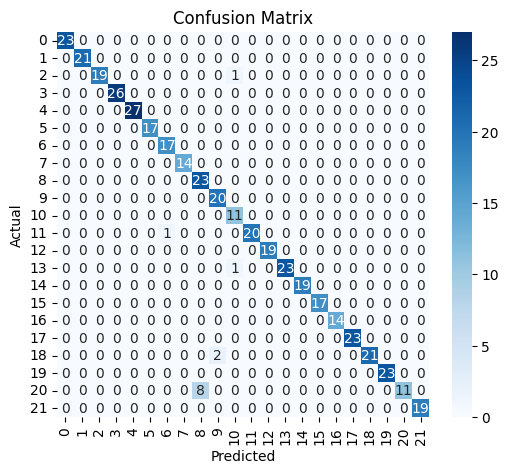

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



- **Precision and Recall**

In [ ]:
# Precision and recall (macro average for multiclass)
precision_rf = precision_score(y_test, y_pred_test, average='macro')
recall_rf = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision_rf:.2f}")
print(f"Recall: {recall_rf:.2f}")
f1_rf= f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1_rf:.2f}")



NameError: name 'precision_score' is not defined

#### **Cross Validation**

In [ ]:
# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores = cross_val_score(DecisionTree, X, y, cv=kf, scoring="accuracy")
Mean_Accuracy_dtc= round(scores.mean(),2)
print("Cross-validation accuracies:", scores)
print(Mean_Accuracy_dtc)

### **Support Vector Classifier**

In [72]:
svm_model = SVC(kernel='rbf', random_state=2)
svm_model.fit(X_train,y_train)

SVC(random_state=2)

- #### **Prediction**

In [74]:
y_pred = svm_model.predict(X_train)
print(y_pred[:6])
y_pred_test = svm_model.predict(X_test)
print(y_pred_test[:6])

[16  2 10  1 12 11]
[15 21 17 17  0 12]


- #### **Evaluation**

- **MAE**

In [ ]:
train_mae_svc=mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {train_mae_svc:.2f}");
test_mae_svc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae_svc:.2f}"));

Training MAE: 0.15
Test MAE: 0.30
None


- **Accuracy**

In [ ]:
train_acc_svc = metrics.accuracy_score(y_train, y_pred)
print(f"SVM's Train Accuracy is: {train_acc_svc:.2f}");
test_acc_svc= metrics.accuracy_score(y_test, y_pred_test)
print(f"SVM's Test Accuracy is: {test_acc_svc:.2f}");

SVM's Train Accuracy is: 0.99
SVM's Test Accuracy is: 0.97


- #### **Cross Validation**

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
X = df2.drop(columns = "label")
y = df2["label"]

# Evaluate model with cross-validation
scores_svm = cross_val_score(svm_model, X, y, cv=kf, scoring="accuracy")


- #### **Confusion matrix**

In [ ]:
print("Cross-validation accuracies:", scores)
print("Mean Accuracy:", scores.mean())

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- **Precision and recall**

In [ ]:
# Precision and recall (macro average for multiclass)
svm_precision = precision_score(y_test, y_pred_test, average='macro')
svm_recall = recall_score(y_test, y_pred_test, average='macro')
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
svm_f1 = f1_score(y_test, y_pred_test, average='macro')
print(f"F1-score:{f1:.2f}")

#### **XGBClassifier**

In [ ]:
xgb_Model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, max_depth=5)
xgb_Model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

- **Prediction**

In [ ]:
y_pred = xgb_Model.predict(X_train)
print(y_pred[:6])
y_pred_test = xgb_Model.predict(X_test)
print(y_pred_test[:6])

[16  2 10  1 12 11]
[15 21 17 17  0 12]


#### **Evaluation**

- **MAE**

In [ ]:
training_mae_xgbc =mean_absolute_error(y_train,y_pred)
print(f"Training MAE: {training_mae:.2f}");
test_mae_xgbc = mean_absolute_error(y_test,y_pred_test)
print(print(f"Test MAE: {test_mae:.2f}"));

Training MAE: 0.00
Test MAE: 0.12
None


- **Accuracy**

In [ ]:
mas_train_xgbc = metrics.accuracy_score(y_train, y_pred)
print(f"XGBC's Train Accuracy is: {mas_train:.2f}");
mas_test_xgbc = metrics.accuracy_score(y_test, y_pred_test)
print(f"XGBC's Test Accuracy is: {mas_test:.2f}");

XGBC's Train Accuracy is: 1.00
XGBC's Test Accuracy is: 0.99


- **Precision, Recall, F1**

In [ ]:
precision_xgbc = precision_score(y_test, test_pred, average='macro')
recall_xgbc = recall_score(y_test, test_pred, average='macro')
f1_xgbc = f1_score(y_test, test_pred, average='macro')
print(f"Precision: {precision_xgbc = precision_score(y_test, test_pred, average='macro'):.2f}")
print(f"Recall:    {recall_xgbc:.2f}")
print(f"F1-score:  {f1_xgbc:.2f}")

- **Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix: {XGBClassifier}')
plt.show()

#### **Best Model Recommendation**

In [ ]:
metrics_df = pd.DataFrame({
    "Logistic Regression": [
        round(precision_lr, 2), 
        round(recall_lr, 2), 
        round(f1_lr, 2), 
        round(test_mae_lr, 2),
        round(training_mae_lr, 2),
        round(mas_train_lr, 2), 
        round(mas_test_lr, 2)
    ]
}, index=[
    'Precision', 
    'Recall', 
    'F1-score',
    'Mean Absolute Error training', 
    'Mean Absolute Error test',
    'Train Accuracy',
    'Test Accuracy',
    
    
])
metrics_df["SVM"] = [
    round(svm_precision, 2),
    round(svm_recall, 2),
    round(svm_f1, 2),
    round(svm_train_mae, 2),
    round(svm_test_mae, 2),
    round(svm_train_acc, 2),
    round(svm_test_acc, 2)
]

print(metrics_df)


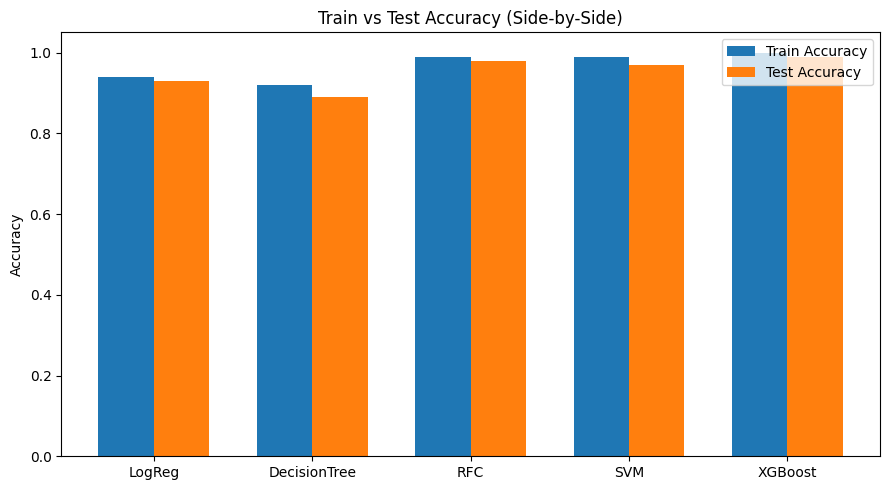

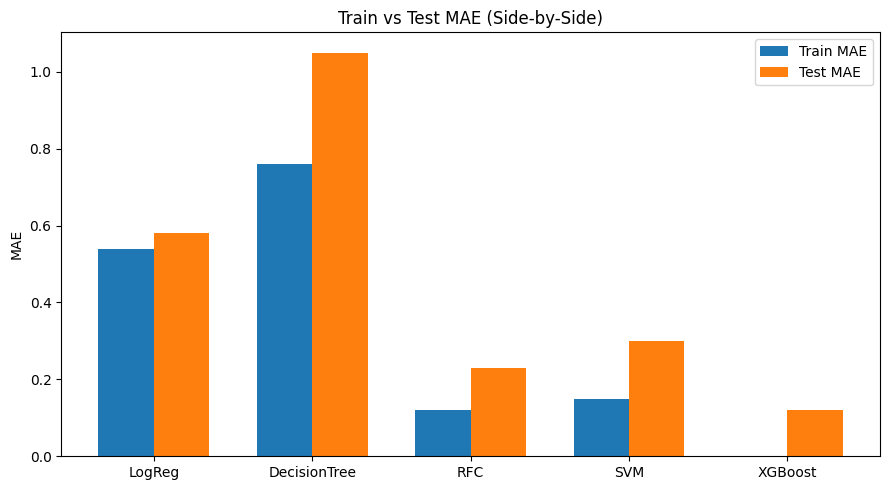

In [ ]:
# Data
models = ["LogReg", "DecisionTree", "RFC", "SVM", "XGBoost"]

train_acc = [0.94, 0.92, 0.99, 0.99, 1.00]
test_acc = [0.93, 0.89, 0.98, 0.97, 0.99]

train_mae = [0.54, 0.76, 0.12, 0.15, 0.00]
test_mae = [0.58, 1.05, 0.23, 0.30, 0.12]

# X locations
x = np.arange(len(models))
width = 0.35  # width of bars

# Path to save figures
save_path = r"C:\Users\Admin\OneDrive - United States International University (USIU)\Documents\USIU_A\FS2025\DSA3020VA\Crop\reports\figures"

# -----------------------------
# Plot 1: Train vs Test Accuracy
# -----------------------------
plt.figure(figsize=(9,5))
plt.bar(x - width/2, train_acc, width, label="Train Accuracy")
plt.bar(x + width/2, test_acc, width, label="Test Accuracy")
plt.xticks(x, models)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy (Side-by-Side)")
plt.legend()
plt.tight_layout()

plt.savefig(f"{save_path}\\accuracy_comparison.png", dpi=300)  # SAVE PLOT
plt.show()

# -----------------------------
# Plot 2: Train vs Test MAE
# -----------------------------
plt.figure(figsize=(9,5))
plt.bar(x - width/2, train_mae, width, label="Train MAE")
plt.bar(x + width/2, test_mae, width, label="Test MAE")
plt.xticks(x, models)
plt.ylabel("MAE")
plt.title("Train vs Test MAE (Side-by-Side)")
plt.legend()
plt.tight_layout()

plt.savefig(f"{save_path}\\mae_comparison.png", dpi=300)  # SAVE PLOT
plt.show()


**Selected Final Model**
- 🏆 Final Model: XGBoost Classifier (XGBC)

Justification:
- Highest Test Accuracy (0.99)
- Lowest Test MAE (0.12)
- Excellent generalization with no significant overfitting
- Handles nonlinear patterns and feature interactions exceptionally well
- Efficient and stable for deployment in real-time applications
**The XGBoost model was therefore selected as the final model for deployment in the Crop Recommendation System.**

#### **Saving the Model**

In [ ]:
joblib.dump(model_train, "classification_model.pkl")